In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# MLflow
import mlflow
import mlflow.sklearn
import mlflow.xgboost

# Scikit-learn imports (ONLY the ones we actually use)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, f1_score,
    balanced_accuracy_score, roc_curve, roc_auc_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# XGBoost
import xgboost as xgb

# Imbalanced data handling
from imblearn.combine import SMOTEENN


In [2]:
data=pd.read_csv("C:\\Users\\poluk\\Desktop\\AI_ML_Projects\\Churn_MLOps\\data\\Telecom_processed.csv")

In [3]:
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber_optic,InternetService_No,Contract_One_year,Contract_Two_year,PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,1,1,1,0,1,0,1,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,1,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,1,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,1,0,0,45,0,1,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,1,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [4]:
data.columns = data.columns.str.replace(' ', '_')

<Axes: >

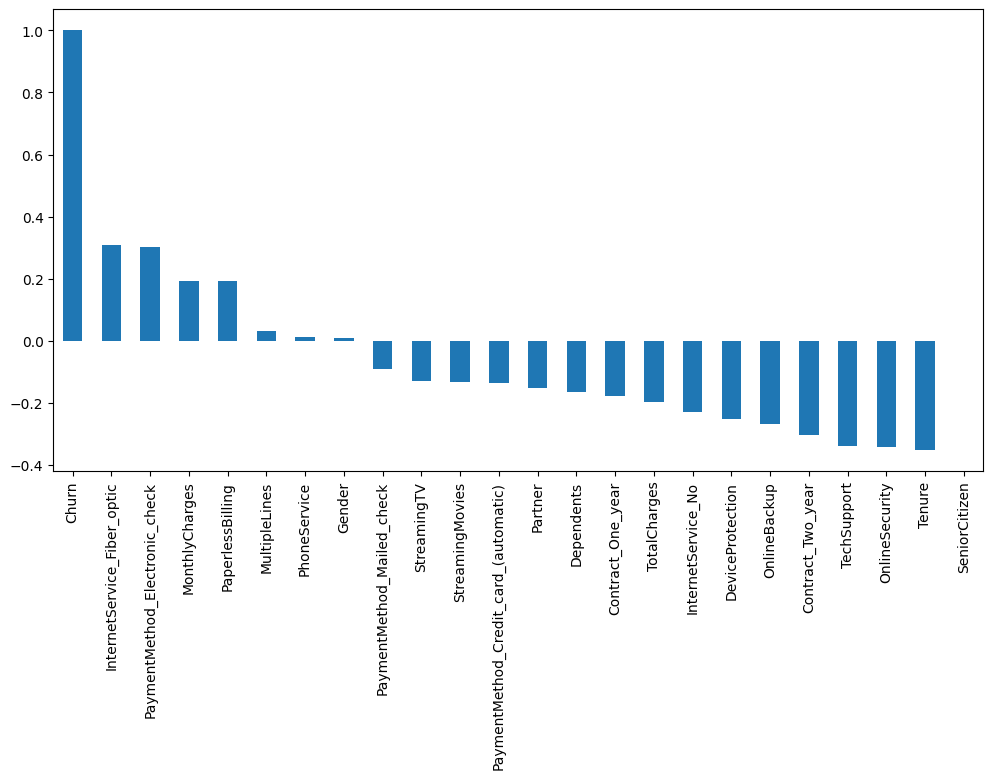

In [5]:
plt.figure(figsize=(12,6))
data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


In [6]:
data.rename(columns={'PaymentMethod_Credit_card_(automatic)': 'PaymentMethod_Credit_card_automatic'}, inplace=True)

In [7]:
data.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber_optic', 'InternetService_No',
       'Contract_One_year', 'Contract_Two_year',
       'PaymentMethod_Credit_card_automatic', 'PaymentMethod_Electronic_check',
       'PaymentMethod_Mailed_check'],
      dtype='object')

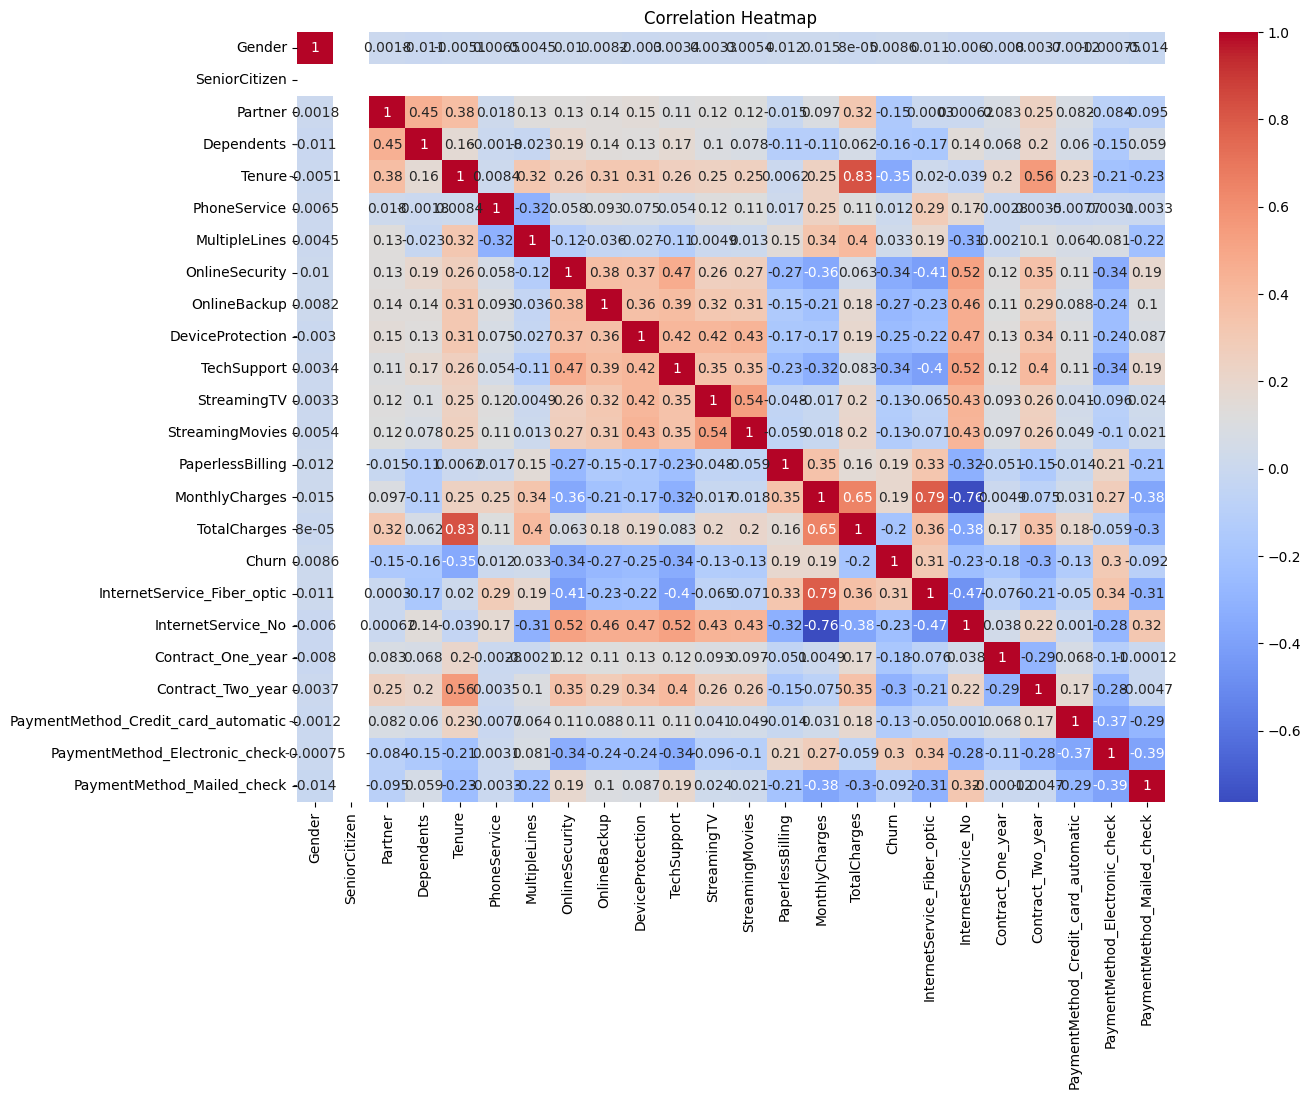

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [9]:
X=data.drop(columns=['Churn'])
y=data['Churn']

In [10]:
X.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber_optic', 'InternetService_No',
       'Contract_One_year', 'Contract_Two_year',
       'PaymentMethod_Credit_card_automatic', 'PaymentMethod_Electronic_check',
       'PaymentMethod_Mailed_check'],
      dtype='object')

In [11]:
X.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber_optic,InternetService_No,Contract_One_year,Contract_Two_year,PaymentMethod_Credit_card_automatic,PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,1,1,1,0,1,0,1,0,1,0,...,1,29.85,29.85,0,0,0,0,0,1,0
1,0,1,0,0,34,1,0,1,0,1,...,0,56.95,1889.50,0,0,1,0,0,0,1
2,0,1,0,0,2,1,0,1,1,0,...,1,53.85,108.15,0,0,0,0,0,0,1
3,0,1,0,0,45,0,1,1,0,1,...,0,42.30,1840.75,0,0,1,0,0,0,0
4,1,1,0,0,2,1,0,0,0,0,...,1,70.70,151.65,1,0,0,0,0,1,0


In [12]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [13]:
import os
import joblib

# 1. Train/Test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# 2. Handle imbalance (NO SCALING)

smoteenn = SMOTEENN(random_state=42)
X_res, y_res = smoteenn.fit_resample(X_train, y_train)


# 3. Build XGBoost model

model = xgb.XGBClassifier(
    eval_metric="logloss",
    n_estimators=350,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# 4. Train
model.fit(X_res, y_res)


# 5. Evaluate

y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

auc = roc_auc_score(y_test, y_prob)
bal_acc = balanced_accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n=== METRICS ===")
print("AUC:", auc)
print("Balanced Accuracy:", bal_acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1:", f1)

# 6. MLflow Tracking + Logging

mlflow.set_experiment("Churn_MLOps_Final")

with mlflow.start_run(run_name="XGB_RAW_FINAL"):

    mlflow.log_metric("auc", auc)
    mlflow.log_metric("balanced_accuracy", bal_acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1", f1)

    mlflow.log_param("n_estimators", 350)
    mlflow.log_param("learning_rate", 0.05)
    mlflow.log_param("max_depth", 6)

    mlflow.xgboost.log_model(
        xgb_model=model,
        artifact_path="model",
        registered_model_name="ChurnPredictionModel"
    )

print("\n Model logged & registered to MLflow as 'ChurnPredictionModel'")


# 7. Save production model (.pkl for FastAPI)

# os.makedirs("models", exist_ok=True)
joblib.dump(model, "../models/xgb_churn_best.pkl")
print("Saved model → models/xgb_churn_best.pkl")


2025/11/30 15:19:24 INFO mlflow.tracking.fluent: Experiment with name 'Churn_MLOps_Final' does not exist. Creating a new experiment.



=== METRICS ===
AUC: 0.8320842698080549
Balanced Accuracy: 0.751884574646723
Precision: 0.5212569316081331
Recall: 0.7540106951871658
F1: 0.6163934426229508


2025/11/30 15:19:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/30 15:19:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'ChurnPredictionModel'.



 Model logged & registered to MLflow as 'ChurnPredictionModel'
Saved model → models/xgb_churn_best.pkl


Created version '1' of model 'ChurnPredictionModel'.
